In [1]:
import os.path
from pathlib import Path
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as mt
import numpy as np
from scipy import stats as st





In [3]:
#создадим папку
Path('datasets').mkdir(parents=True, exist_ok=True)

#словарь с именем файла и сылкой на него
urls = {
    'gamt' : ('', 'game.csv'),

}

#проверим есть ли файл 
for dict1 in urls:
    if not os.path.exists(urls.get(dict1)[1]):
        print(urls.get(dict1)[1], 'файл не найден, будет загружен из интренета')
        #качаем файл по ссылке
        urllib.request.urlretrieve(*urls.get(dict1))
    else:
        print(urls.get(dict1)[1], 'файл найден')

game.csv файл найден


In [4]:
df = pd.read_csv('')


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
for name in df:
    df.rename(columns={name: name.lower()}, inplace=True)


In [7]:
years_relese = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
years_relese

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


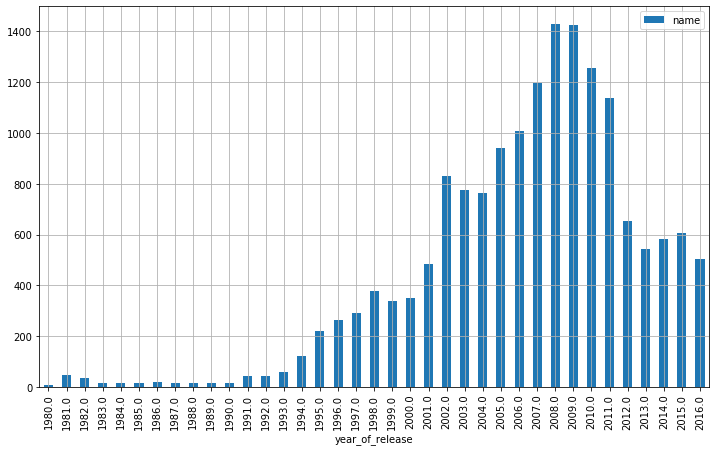

In [8]:
years_relese.plot(kind='bar', xticks=years_relese.index, figsize=(12,7), grid=True)
plt.show()



In [9]:
df = df.query('year_of_release > 2001').reset_index(drop=True)

In [10]:
genre = df['genre'].unique()

In [11]:
dict_of_rating = {}

def rating_q(df):
    
    for rate in genre:
        
        rate1 = df.query('genre == @rate')
        
        c = ''
        
        for i in rate1['rating']:
            
            if i != i:
                continue
            else:
                c = i
                break
        
        for rate2 in rate1['rating']:
            dict_of_rating.setdefault(rate,c)
            break
        

In [12]:
rating_q(df)
dict_of_rating

{'Sports': 'E',
 'Racing': 'E',
 'Platform': 'E',
 'Misc': 'E',
 'Simulation': 'E',
 'Action': 'M',
 'Role-Playing': 'M',
 'Puzzle': 'E',
 'Shooter': 'M',
 'Fighting': 'T',
 'Adventure': 'M',
 'Strategy': 'T'}

In [13]:
def rating_remover(row):
    
    rating = row['rating']
    genre = row['genre']
    
    if rating != rating:
        
        return dict_of_rating[genre]
    return rating

def tbd(row):
    
    user_score = row['user_score']
    
    if user_score == "tbd":
        
        return -1
    return user_score

def all_sales(row):
    
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    other_sales = row['other_sales']
    jp_sales = row['jp_sales']
    
    return na_sales + eu_sales + other_sales + jp_sales
    
    


In [14]:
df['rating'] = df.apply(rating_remover, axis=1)
df['user_score'] = df.apply(tbd, axis=1)
df['all_sales'] = df.apply(all_sales, axis=1)
df['year_of_release'] = df['year_of_release'].astype("int64")
df['user_score'] = df['user_score'].astype("float")



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13638 entries, 0 to 13637
Data columns (total 12 columns):
name               13638 non-null object
platform           13638 non-null object
year_of_release    13638 non-null int64
genre              13638 non-null object
na_sales           13638 non-null float64
eu_sales           13638 non-null float64
jp_sales           13638 non-null float64
other_sales        13638 non-null float64
critic_score       7418 non-null float64
user_score         9249 non-null float64
rating             13638 non-null object
all_sales          13638 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.2+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
13633,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
13634,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
13635,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
13636,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


 <h3>Вывод по 2 шагу</h3>


В результате было:
<li>Заменены названия столбцов</li>
<li>Преобразованны данные в нужные типы</li>
<li>Обработаны пропуски</li>
<li>Посчитанны суммарные продажи во всех регионах</li>


В было обнаруженно, что столбец "year_of_release" имеет тип float он был замене на int<br>
Пропуски в столбце "rating" были заменены следуйщим образом:<br>была написанна фунция, которая групирует исходную таблицу по жанрам и находит самый часто всречающийся рейтинг ESRB для данной категории<br>
Аббревиатура 'tbd'была замена на -1 для удобсва использования данных<br>
Пропуски в столбцах "critic_score" и "user_score" не были заменены, потому что их нельзя заменить по какому-то приципу<br><br>

Для удобсва был взяты игры вышедшие после 2001, так нас не интресуют игры более поздних готов, потому что платформы для их запуска сильно не актуальны



<h1>Шаг 3. Проведите исследовательский анализ данных</h1>

In [17]:
platform = df['platform'].unique()

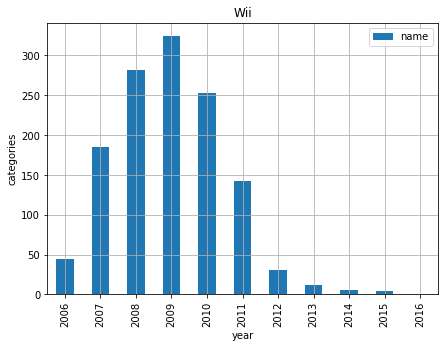

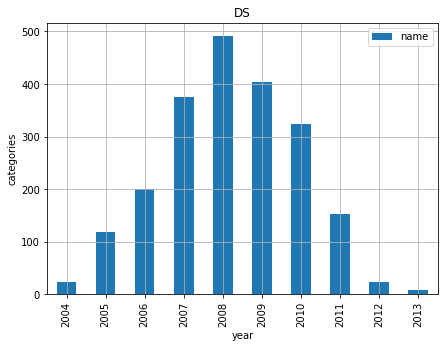

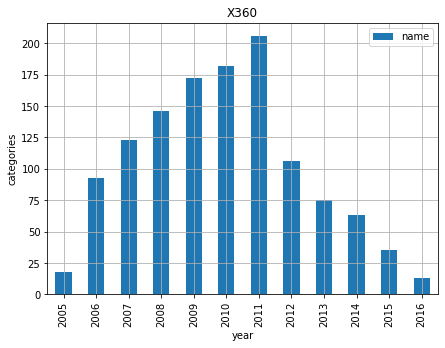

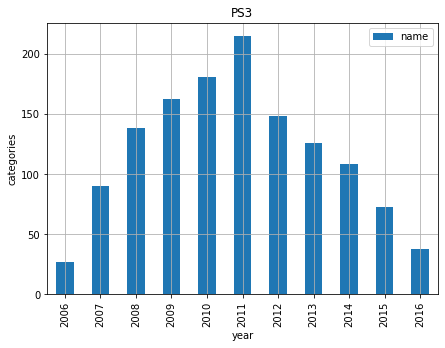

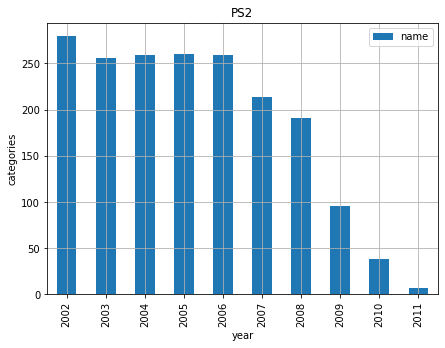

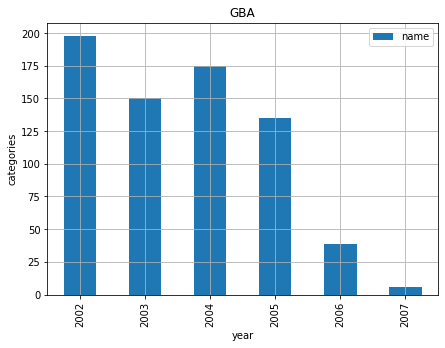

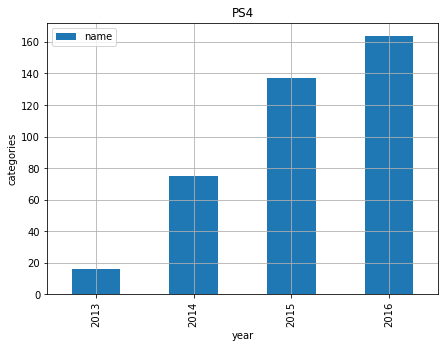

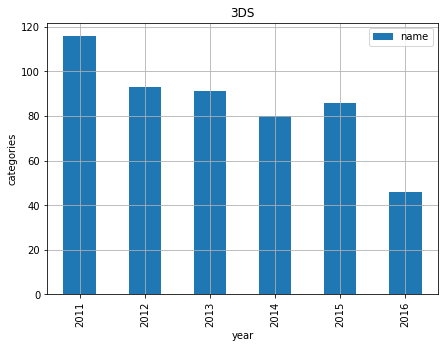

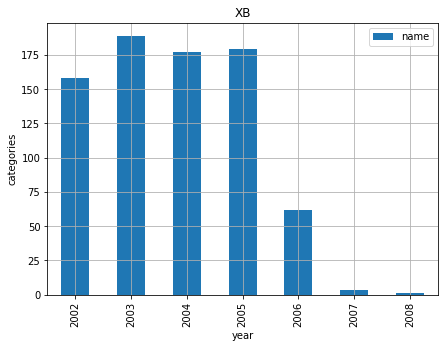

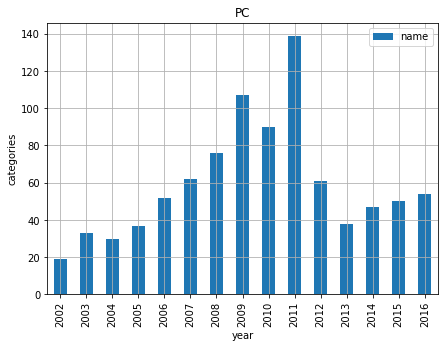

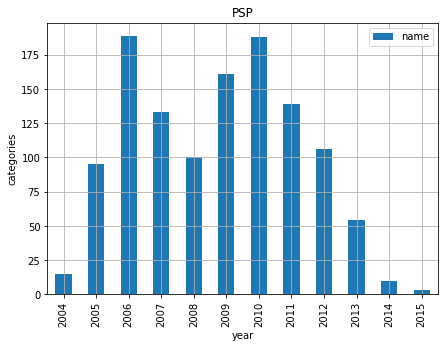

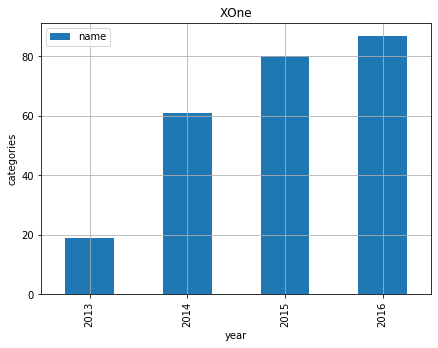

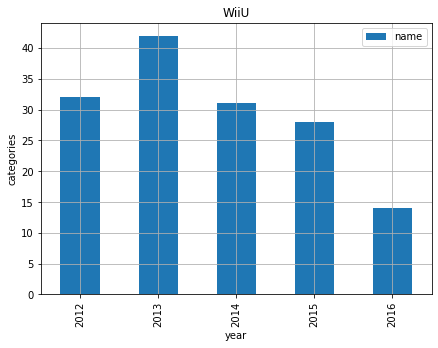

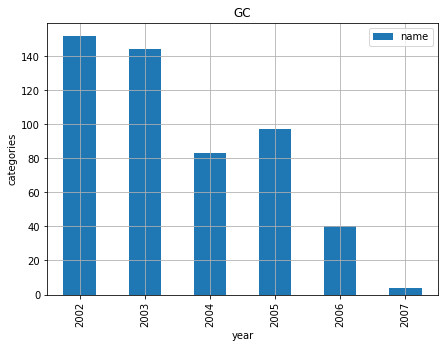

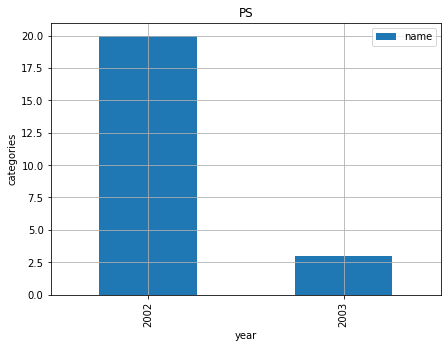

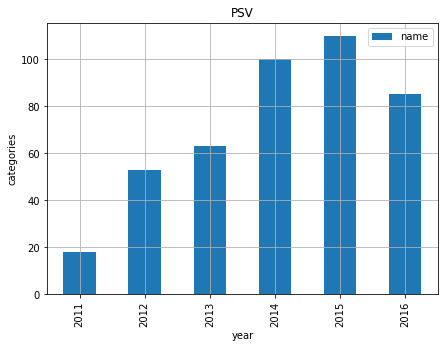

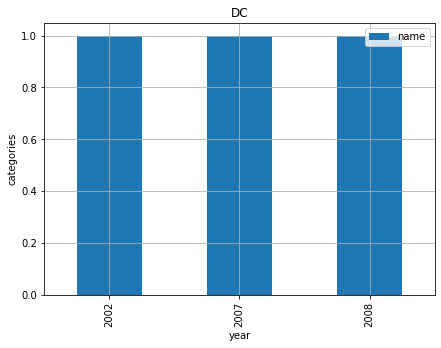

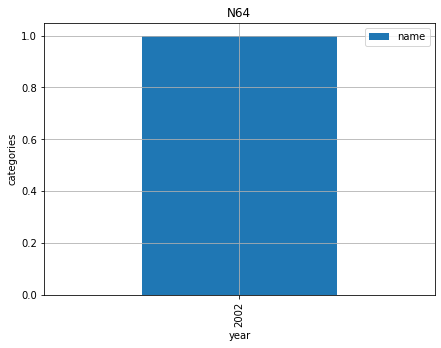

In [18]:
for platform_name in platform:
    
    x = df.query('platform == @platform_name')
    years_relese_platform = x.pivot_table(index='year_of_release', values='name', aggfunc='count')
    years_relese_platform.plot(kind='bar', xticks=years_relese.index, figsize=(7,5), grid=True)
    plt.title(platform_name)
    plt.ylabel('categories')
    plt.xlabel('year')
    plt.show()
    

В результате для платформ быдо обнаруженно: <br>
<li>Wii утратила свою популярноть после 2009(более 300 игр). К 2016 году ее игр потчи равны 0</li>
<li>DS перестала быть попуряной после 2009(почти 500 игр). В 2014 0 игр </li>
<li>X360 перестала быть попуряной после 2013(75 игр). К 2016 около 15 игр</li>
<li>PS3 все еще актуальна, но кол-во игр начало падать посде 2013</li>
<li>PS2 не актальная платформа</li>
<li>GBA не актальная платформа</li>
<li>PS4 попульрная платформа кол-во игр растет с 2013</li>
<li>3DS актуальная платформа с 2012-2015 примерно одинаковое кол-во игр. В 2016 резкое падение по кол-ву игр в 2 раза меньше</li>
<li>XB не актальная платформа</li>
<li>PC актуальная платформа</li>
<li>PSP не актуальная платформа</li>
<li>XOne попульрная платформа кол-во игр растет с 2013</li>
<li>WiiU актуальная платформа но кол-во игр в 2016 по сравнению с 2015 упало в 2</li>
<li>GC не актальная платформа</li>
<li>PS не актальная платформа</li>
<li>PSV актальная платформа</li>
<li>N64 не актальная платформа</li><br>

In [19]:
l = []
l1 = []
dict2 = {} 

for platform_name1 in platform:
    
    x = df.query('platform == @platform_name1')
    years_relese_platform1 = x.pivot_table(index='year_of_release', values='name', aggfunc='count')
    l.append(platform_name1)
    l1.append(years_relese_platform1['name'].sum())
    dict2.setdefault(platform_name1, years_relese_platform1['name'].sum())

In [20]:
indexes = {'values' : l}
years_table = pd.DataFrame(indexes).set_index('values')


for dict2_name in dict2:
    
    years_table.loc[dict2_name, 'count'] = dict2[dict2_name]
    
years_table['count'] = years_table['count'].astype('int64')
years_table.sort_values(by='count')   


,count
values,
N64,1
DC,3
PS,23
WiiU,147
XOne,247
PS4,392
PSV,429
3DS,512
GC,520


In [21]:
df = df.query('year_of_release > 2013').reset_index(drop=True)
popular_platform = df.pivot_table(index=['year_of_release', 'platform'],values='name', aggfunc='count')#.sort_values(by='name',ascending=False)
popular_platform

name
year_of_release platform      
2014            3DS         80
                PC          47
                PS3        108
                PS4         75
                PSP         10
                PSV        100
                Wii          6
                WiiU        31
                X360        63
                XOne        61
2015            3DS         86
                PC          50
                PS3         73
                PS4        137
                PSP          3
                PSV        110
                Wii          4
                WiiU        28
                X360        35
                XOne        80
2016            3DS         46
                PC          54
                PS3         38
                PS4        164
                PSV         85
                Wii          1
                WiiU        14
                X360        13
                XOne        87

Был взят актуальный актуальный период с 2014 года, так как для анализа данных на 2017 нас интресуют только новые и прибыльные платформы : XOne, PSV, PC, WiiU, PS4<br>

Сумарное кол-во игр с 2014 года:
<li>XOne: 228</li>
<li>PSV: 295</li>
<li>PC: 151</li>
<li>WiiU: 73</li>
<li>PS4: 376</li>

In [22]:
popular_platform = ['PS4', '3DS', 'XOne','PC', 'PSV']



count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: all_sales, dtype: float64


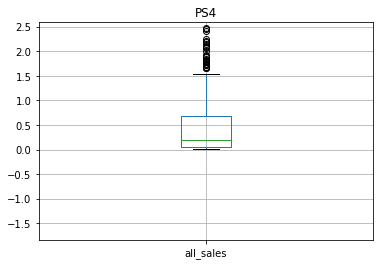

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: all_sales, dtype: float64


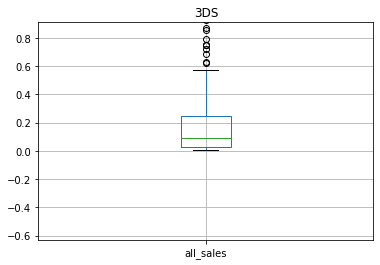

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: all_sales, dtype: float64


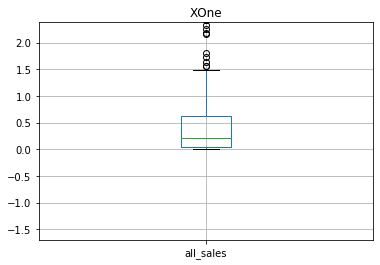

count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: all_sales, dtype: float64


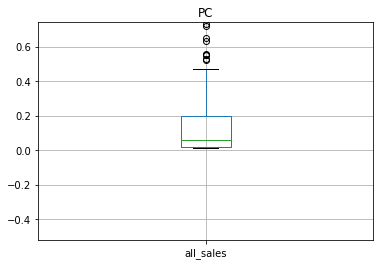

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: all_sales, dtype: float64


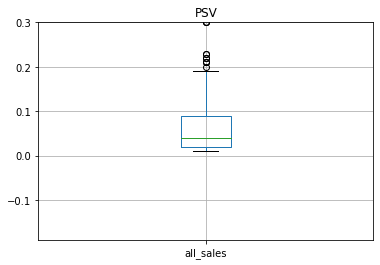

In [23]:
 for hist in popular_platform :
        
        
        df1 = df.query('platform == @hist')
        Q1 = df1['all_sales'].describe()['25%'] 
        Q3 = df1['all_sales'].describe()['75%']
        q1 = Q1 - 3 * (Q3 - Q1)
        q3 = Q3 + 3 * (Q3 - Q1)
        
        print(df1['all_sales'].describe())
        df1['all_sales'].plot.box(grid=True)
        plt.title(hist)
        #sns.boxplot(data=df1, x='all_sales', palette='rainbow')
        plt.ylim(q1,q3)
        plt.show()
        

Разница между платформами формируется из-за того, что на такие платформы как PS4  и XONE выходит огромное кол-во эксклюзивов, а также сами платформы стоят намного дешелве, и может 'тянуть' требователтные игры



In [24]:
pc_sales = df.query('platform == "PC"')
pc_sales



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
51,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
135,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
148,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,NaN,NaN,E,1.19
152,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
191,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
1634,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
1661,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,T,0.01
1665,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,M,0.01


count    127.000000
mean       6.011024
std        2.194663
min       -1.000000
25%        4.800000
50%        6.800000
75%        7.550000
max        9.300000
Name: user_score, dtype: float64


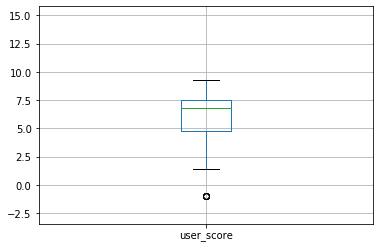

count    116.000000
mean      76.215517
std        9.769345
min       43.000000
25%       71.000000
50%       77.000000
75%       83.250000
max       96.000000
Name: critic_score, dtype: float64


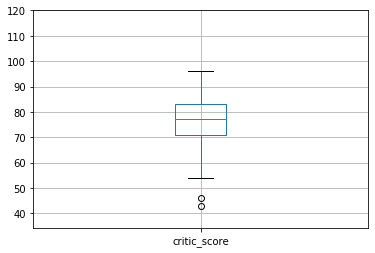

In [25]:
pc_sales['user_score'].fillna(-1)
pc_sales['critic_score'].fillna(-1)



l3 = ['user_score', 'critic_score']

for pc in l3:


    Q1 = pc_sales[pc].describe()['25%'] 
    Q3 = pc_sales[pc].describe()['75%']
    q1 = Q1 - 3 * (Q3 - Q1)
    q3 = Q3 + 3 * (Q3 - Q1)

    print(pc_sales[pc].describe())
    pc_sales[pc].plot.box(grid=True)
    plt.ylim(q1,q3)
    plt.show()

In [26]:
pc_sales = pc_sales.query('(user_score > 0)'
                         'and (critic_score > 0 )')

In [27]:
pc_sales1 = pd.DataFrame({'critic_score': pc_sales['critic_score'], 'user_score': pc_sales['user_score'], 'all_sales': pc_sales['all_sales']})

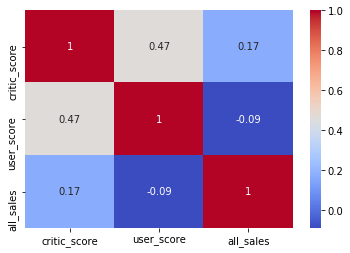

In [28]:
sns.heatmap(pc_sales1.corr(), cmap='coolwarm',annot=True)
plt.show()

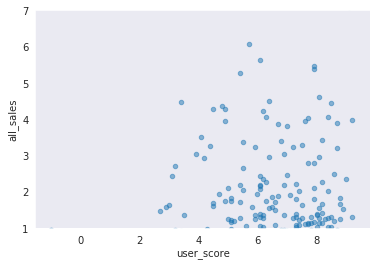

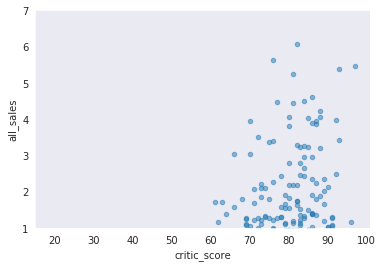

In [29]:
for hist4 in l3:
    
    sns.set_style("darkgrid", {'axes.grid' : False})
    df.sort_values('all_sales').plot(x=hist4, y='all_sales', kind='scatter', alpha=0.5)
    plt.ylim(1,7)
    plt.show()

Поститав корреляцию отзывово и колтчествам продаж:
<li>Кореляция между оценкой критиков и продажами: 0.17</li>
<li>Кореляция между оценкой игроков и продажами: -0.09</li>

Делаем вывод, что прямой завсимости между продажами и оценкой нет<br>
По диаграме рассеяния же видно, что игры с более высокой оценкой имеют больше продаж <br>

<div class="alert alert-info" role="alert">
Цвет кружков как-то можно поменять? И как-то можно эту диаграму сделать красивее?
</div>


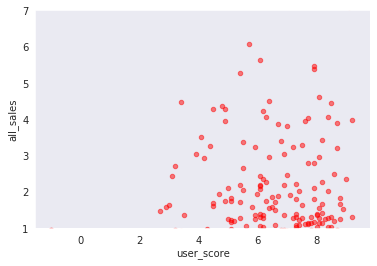

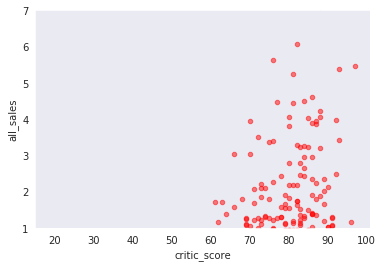

In [30]:
# Код ревьюера
for hist4 in l3:
    
    sns.set_style("darkgrid", {'axes.grid' : False})
    df.sort_values('all_sales').plot(x=hist4, y='all_sales', kind='scatter', alpha=0.5, color='r')
    plt.ylim(1,7)
    plt.show()



In [31]:
df_genre = df.pivot_table(index='genre', values='all_sales', aggfunc='sum')
df_genre

,all_sales
genre,
Action,199.36
Adventure,17.55
Fighting,28.22
Misc,37.55
Platform,18.09
Puzzle,2.21
Racing,27.52
Role-Playing,101.44
Shooter,170.94


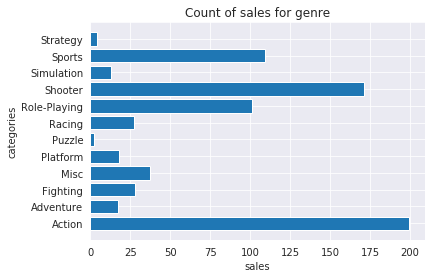

In [32]:
plt.barh(df_genre.index, df_genre['all_sales'])
plt.grid(True)
plt.title('Count of sales for genre')
plt.ylabel('categories')
plt.xlabel('sales')
plt.show()


Самые популярные жанры:
<li>Action: 169.78 млн продаж</li>
<li>Shooter: 166.07 млн продаж</li>
<li>Sports: 106.22 млн продаж</li>

Самые не  популярные жанры:
<li>Puzzle: 1.28 млн продаж</li>
<li>Strategy: 3.01 млн продаж</li>
<li>Simulation: 10.82 млн продаж</li>


Средняя продолжительность существования какой-либо платформы 7 лет, PC как платформа акктаульна всегда






<h1>Шаг 4. Составьте портрет пользователя каждого региона</h1>

In [33]:
 # далее функции для нахожения долей продаж в след ячейке пояснения 


def sel_eu(row):
    
    all_sales = row['all_sales']
    eu_sales = row['eu_sales']
    
    return eu_sales / all_sales


def sel_jp(row):
    
    all_sales = row['all_sales']
    jp_sales = row['jp_sales']
    
    return jp_sales / all_sales
    
    
def sel_na(row):
    
    all_sales = row['all_sales']
    na_sales = row['na_sales']
    
    return na_sales / all_sales
    
    


In [34]:
# название переменых временые
for plat in popular_platform :
    
    qq = ""
    ff = ""
    ee = ""
    
    qq = df['genre'].unique()# создаю список с жанрами
    ff =  {plat: qq} # создаю название  индеков
    ee = pd.DataFrame(ff).set_index(plat) # получаю пустую таблицу с индексами в виде жанров
    
    popular = df.query('platform == @plat' )# применяю фильтр, чтобы в таблице была одна платформа 
    popular1 = popular.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'all_sales'], aggfunc='sum') 
    # группирую таблицу, чтобы получить продажи каждого жанра в каждом регионе
    ee['eu'] = popular1.apply(sel_eu, axis=1)# Применяю фунцию для того чтобы найти долю продаж в регионе 
    ee['jp'] = popular1.apply(sel_jp, axis=1)# Применяю фунцию для того чтобы найти долю продаж в регионе 
    ee['na'] = popular1.apply(sel_na, axis=1)# Применяю фунцию для того чтобы найти долю продаж в регионе 
    
    #display(plat)
    display(ee)
    print()
# И в итоге с Японцами возникают какие-то проблемы поэтому я не понимаю где ошибка



,eu,jp,na
PS4,,,
Shooter,0.444175,0.031991,0.365027
Action,0.443571,0.063632,0.340210
Role-Playing,0.412556,0.122456,0.322180
Sports,0.472705,0.017397,0.349930
Fighting,0.345408,0.097025,0.406210
Racing,0.642717,0.022638,0.185039
Misc,0.410553,0.054054,0.379665
Platform,0.503690,0.012915,0.324723
Simulation,0.552846,0.146341,0.170732


,eu,jp,na
3DS,,,
Shooter,NaN,NaN,NaN
Action,0.169084,0.600635,0.198096
Role-Playing,0.170415,0.504498,0.280860
Sports,0.356061,0.416667,0.181818
Fighting,0.172840,0.346914,0.418519
Racing,NaN,NaN,NaN
Misc,0.275325,0.532468,0.158442
Platform,0.256281,0.309045,0.374372
Simulation,0.288136,0.501211,0.171913


,eu,jp,na
XOne,,,
Shooter,0.296985,0.002889,0.608955
Action,0.350934,0.001288,0.559884
Role-Playing,0.325118,0.000948,0.582938
Sports,0.333193,0.000845,0.576436
Fighting,0.202765,0.004608,0.691244
Racing,0.525399,0.005806,0.390421
Misc,0.272997,0.001484,0.637982
Platform,0.451613,0.000000,0.467742
Simulation,0.484848,0.000000,0.424242


,eu,jp,na
PC,,,
Shooter,0.602763,0.0,0.322971
Action,0.621723,0.0,0.310861
Role-Playing,0.566735,0.0,0.361396
Sports,0.838710,0.0,0.107527
Fighting,0.900000,0.0,0.100000
Racing,0.953125,0.0,0.000000
Misc,1.000000,0.0,0.000000
Platform,0.833333,0.0,0.166667
Simulation,0.749621,0.0,0.182094


,eu,jp,na
PSV,,,
Shooter,0.250000,0.015625,0.500000
Action,0.183400,0.655957,0.081660
Role-Playing,0.081967,0.768852,0.093443
Sports,0.341667,0.375000,0.141667
Fighting,0.130435,0.666667,0.130435
Racing,0.100000,0.900000,0.000000
Misc,0.227405,0.539359,0.128280
Platform,0.526316,0.210526,0.105263
Simulation,0.000000,0.800000,0.200000


        na_sales
rating          
E          59.49
E10+       33.23
M         145.76
T          45.58


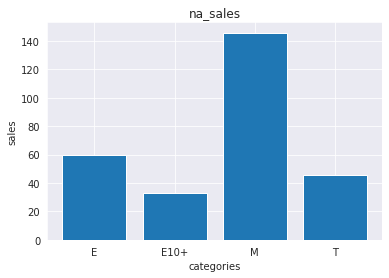

        eu_sales
rating          
E          71.52
E10+       26.16
M         135.79
T          37.21


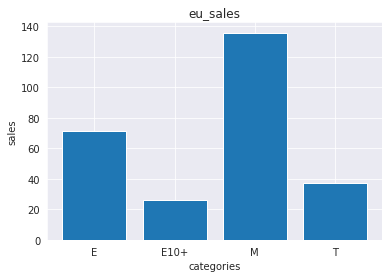

        jp_sales
rating          
E          16.21
E10+        4.46
M          52.21
T          20.21


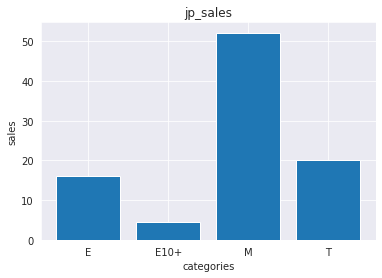

        other_sales
rating             
E             18.87
E10+           7.83
M             42.51
T             12.41


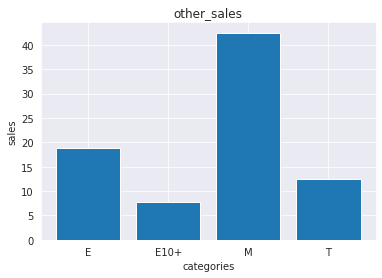

In [35]:
region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']


for reg in region:

    sales = df.pivot_table(index='rating', values=reg, aggfunc='sum')
    plt.bar(sales.index, sales[reg])
    print(sales)
    plt.grid(True)
    plt.title(reg)
    plt.xlabel('categories')
    plt.ylabel('sales')
    plt.show()
    


В результате было выявлено, что самый популярный рейтинг для всех игр это M

<div class="alert alert-info" role="alert">
Можно как-то сделать, чтобы эти графики были рядом, для более удобного сравнения? 2 сверху 2 снизу
</div>

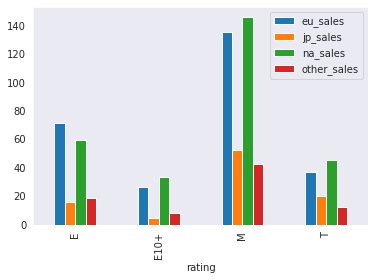

In [37]:
df_genre.sort_values(by='all_sales', ascending=False).head(5)

,all_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55


Топ 5 самых продаваемых жанров:
<li>Action:	169.78</li>
<li>Shooter: 166.07</li>
<li>Sports:	106.22</li>
<li>Role-Playing: 70.28</li>
<li>Misc: 31.94</li>

In [38]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,M,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01


In [39]:
ESRB = df.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales', 'all_sales'], aggfunc='sum')
ESRB

,all_sales,eu_sales,jp_sales,na_sales
rating,,,,
E,166.09,71.52,16.21,59.49
E10+,71.68,26.16,4.46,33.23
M,376.27,135.79,52.21,145.76
T,115.41,37.21,20.21,45.58


In [40]:
ff1 =  {'values': ['E','E10+','M', 'T']}
ee1 = pd.DataFrame(ff1).set_index('values')

In [41]:
ee1['eu'] = ESRB.apply(sel_eu, axis=1)
ee1['jp'] = ESRB.apply(sel_jp, axis=1)
ee1['na'] = ESRB.apply(sel_na, axis=1)


Доли продаж для каждого рейтинга в регионах :<br>
Для Японии:<br>
<li>E: 16.21 </li>
<li>E10+: 4.46</li>
<li>M: 52.21</li>
<li>T: 20.21</li>
Для Европы:<br>
<li>E: 71.52</li>
<li>E10+: 26.16	</li>
<li>M: 135.79</li>
<li>T: 37.21</li>
Для Северной Америки:
<li>E: 59.49</li>
<li>E10+: 33.23	</li>
<li>M: 145.76</li>
<li>T: 45.58</li>

In [42]:
ee1

,eu,jp,na
values,,,
E,0.430610,0.097598,0.358179
E10+,0.364955,0.062221,0.463588
M,0.360884,0.138757,0.387381
T,0.322416,0.175115,0.394940


По данным мы можем увидить:
<li>В Европе E10+,M,T имеют почти одинаковую долю продаж около 35 %, a рейтинг Е имеет 43%</li>
<li>В Японии самый не популярный рейтинг E10+ он занимает 6%, самый популярный Т-17%</li>
<li>В Амереки самый не популярный E-35%, остальные около 40%</li>




<h1>Шаг 5. Проверьте гипотезы</h1>

Формируем нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Альтренативная гипотиза : рейтиги не равны

In [43]:
pc = df.query('platform == "PC"')
xbox = df.query('platform == "XOne"')

pc['user_score'].fillna(-1)
pc = pc.query('user_score > 0')

xbox['user_score'].fillna(-1)
xbox = xbox.query('user_score > 0')



In [44]:
print(f"Дисперсия игр PC {np.var(pc['user_score'], ddof=1)}")
print(f"Дисперсия игр XOne {np.var(xbox['user_score'], ddof=1)}")

Дисперсия игр PC 2.901154315133451
Дисперсия игр XOne 1.8910066518847013


In [45]:
alpha = .05

results = st.stats.ttest_ind(pc['user_score'], xbox['user_score'], equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


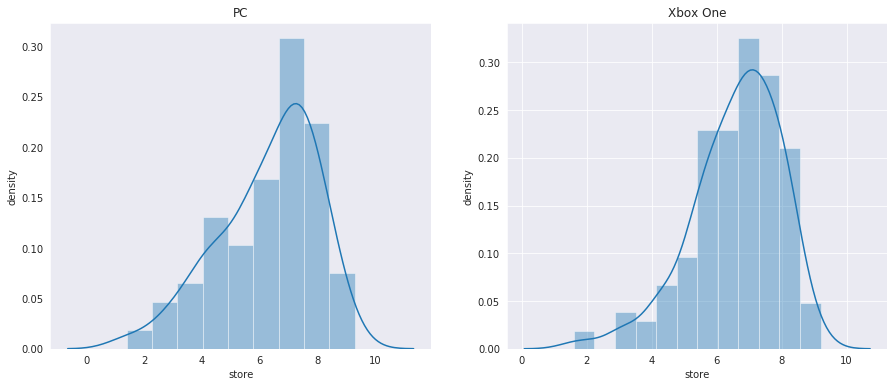

In [46]:
plt.subplot(1, 2, 1)
plt.title('PC')
sns.distplot(pc['user_score'])
sns.set_style("darkgrid", {'axes.grid' : True})
plt.ylabel('density')
plt.xlabel('store')
plt.subplot(1, 2, 2)
plt.title('Xbox One')
sns.distplot(xbox['user_score'])
sns.set_style("darkgrid", {'axes.grid' : True})
plt.ylabel('density')
plt.xlabel('store')
plt.gcf().set_size_inches(15, 6)

Изходя из графиков оценок на PC и Xbox One можно сказать:
<li>Они имеею общее распредение оценок от 5 до 8</li>
<li>Графики почти одинаковые, но имееют расхождения, думаю,что связанно это с эксклюзивами</li>

Формируем нулевую гипотезу: cредние пользовательские рейтинги жанров Action  и Sports  равны<br>
Альтренативная гипотиза : рейтиги не равны

In [47]:
Action = df.query('genre == "Action"')
Sports = df.query('genre == "Sports"')

Action['user_score'].fillna(-1)
Action = Action.query('user_score > 0')

Sports['user_score'].fillna(-1)
Sports = Sports.query('user_score > 0')



In [48]:
print(f"Дисперсия игр Action {np.var(Action['user_score'], ddof=1)}")
print(f"Дисперсия игр Sports {np.var(Sports['user_score'], ddof=1)}")

Дисперсия игр Action 1.8984766584766581
Дисперсия игр Sports 3.446979127609048


In [49]:
alpha = .05

results = st.stats.ttest_ind(Action['user_score'], Sports['user_score'], equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


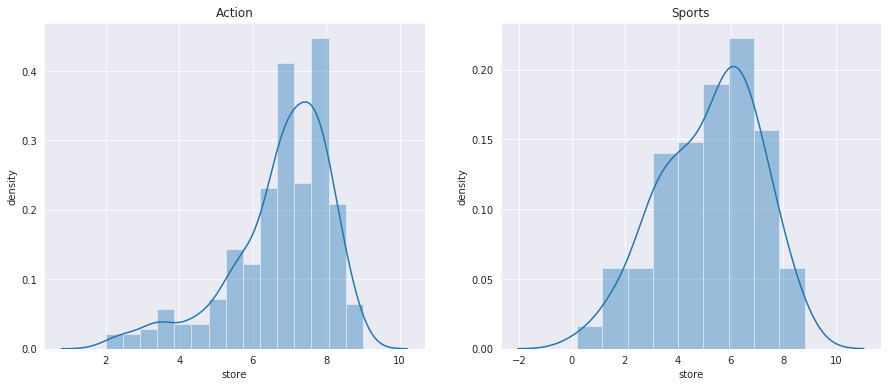

In [50]:
plt.subplot(1, 2, 1)
plt.title('Action')
sns.distplot(Action['user_score'])
plt.ylabel('density')
plt.xlabel('store')
sns.set_style("darkgrid", {'axes.grid' : True})
plt.subplot(1, 2, 2)
plt.title('Sports')
sns.distplot(Sports['user_score'])
sns.set_style("darkgrid", {'axes.grid' : True})
plt.ylabel('density')
plt.xlabel('store')
plt.gcf().set_size_inches(15, 6)

Изходя из графиков оценок на Sports и Action можно сказать:
<li>Они имеею общее распредение оценок от 5 до 7</li>
<li>Action имеет два пика в 7 и 10</li>
<li>Sports имеет пик в 7</li>





<h1>Вывод</h1>

В результате для платформ быдо обнаруженно: <br>
<li>Wii утратила свою популярноть после 2009(более 300 игр). К 2016 году ее игр потчи равны 0</li>
<li>DS перестала быть попуряной после 2009(почти 500 игр). В 2014 0 игр </li>
<li>X360 перестала быть попуряной после 2013(75 игр). К 2016 около 15 игр</li>
<li>PS3 все еще актуальна, но кол-во игр начало падать посде 2013</li>
<li>PS2 не актальная платформа</li>
<li>GBA не актальная платформа</li>
<li>PS4 попульрная платформа кол-во игр растет с 2013</li>
<li>3DS актуальная платформа с 2012-2015 примерно одинаковое кол-во игр. В 2016 резкое падение по кол-ву игр в 2 раза меньше</li>
<li>XB не актальная платформа</li>
<li>PC актуальная платформа</li>
<li>PSP не актуальная платформа</li>
<li>XOne попульрная платформа кол-во игр растет с 2013</li>
<li>WiiU актуальная платформа но кол-во игр в 2016 по сравнению с 2015 упало в 2</li>
<li>GC не актальная платформа</li>
<li>PS не актальная платформа</li>
<li>PSV актальная платформа</li>
<li>N64 не актальная платформа</li><br>

Сумарное кол-во игр с 2014 года:
<li>XOne: 228</li>
<li>PSV: 295</li>
<li>PC: 151</li>
<li>WiiU: 73</li>
<li>PS4: 376</li>


Поститав корреляцию отзывово и колтчествам продаж:
<li>Кореляция между оценкой критиков и продажами: 0.17</li>
<li>Кореляция между оценкой игроков и продажами: -0.09</li>

Делаем вывод, что прямой завсимости между продажами и оценкой нет<br>
По диаграме рассеяния же видно, что игры с более высокой оценкой имеют больше продаж <br>

Самые популярные жанры:
<li>Action: 169.78 млн продаж</li>
<li>Shooter: 166.07 млн продаж</li>
<li>Sports: 106.22 млн продаж</li>

Самые не  популярные жанры:
<li>Puzzle: 1.28 млн продаж</li>
<li>Strategy: 3.01 млн продаж</li>
<li>Simulation: 10.82 млн продаж</li>


В результате было выявлено, что самый популярный рейтинг для всех игр это M<br>

Топ 5 самых продаваемых жанров:
<li>Action:	169.78</li>
<li>Shooter: 166.07</li>
<li>Sports:	106.22</li>
<li>Role-Playing: 70.28</li>
<li>Misc: 31.94</li>


Доли продаж для каждого рейтинга в регионах :<br>
Для Японии:<br>
<li>E: 16.21 </li>
<li>E10+: 4.46</li>
<li>M: 52.21</li>
<li>T: 20.21</li>
Для Европы:<br>
<li>E: 71.52</li>
<li>E10+: 26.16	</li>
<li>M: 135.79</li>
<li>T: 37.21</li>
Для Северной Америки:
<li>E: 59.49</li>
<li>E10+: 33.23	</li>
<li>M: 145.76</li>
<li>T: 45.58</li>

По данным мы можем увидить:
<li>В Европе E10+,M,T имеют почти одинаковую долю продаж около 40 %, a рейтинг Е имеет 47%</li>
<li>В Японии самый не популярный рейтинг E10+ он занимает 6%, самый популярный Т-21%</li>
<li>В Амереки самый не популярный E-39%, остальные около 48%</li>


Изходя из графиков оценок на Sports и Action можно сказать:
<li>Они имеею общее распредение оценок от 5 до 7</li>
<li>Action имеет два пика в 7 и 10</li>
<li>Sports имеет пик в 7</li>

Изходя из графиков оценок на PC и Xbox One можно сказать:
<li>Они имеею общее распредение оценок от 5 до 8</li>
<li>Графики почти одинаковые, но имееют расхождения, думаю,что связанно это с эксклюзивами</li>






